## Math essential for data scientists
## Chapter 6 - Logistic Regression

## The logistic function in Python for one independent variable
Example 6.1

In [1]:
import math

def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

In [2]:
predict_probability(5, -2.823, 0.62)

0.5688105810391961

In [3]:
predict_probability(10, -2.823, 0.62)

0.9669779444898571

Example 6-2. Using SymPy to plot a logistic function

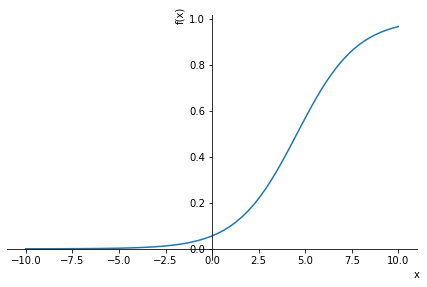

In [4]:
from sympy import *
b0, b1, x = symbols('b0 b1 x')

p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620) # aqui só funcionou depois que eu inclui o 0 depois do 62
x = range(-1, 10, 5)
plot(p)

### Fitting the logistic curve

Example 6-3. Using a plain logistic regression in SciPy

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [6]:
# Load the data
data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = data.values[:,:-1]

# Extract output column (all rows, last column)
Y = data.values[:, -1]

In [7]:
# Perform logistic regression
# Turn off penalty
model = LogisticRegression(penalty='none')
model.fit(X, Y)

# print beta1
print(model.coef_.flatten())
# print beta0
print(model.intercept_.flatten())

[0.69267212]
[-3.17576395]


Making Predictions with .predict() and .predict_proba() methods

In [8]:
model.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [9]:
model.predict_proba(X)

array([[0.92294796, 0.07705204],
       [0.89442465, 0.10557535],
       [0.84827722, 0.15172278],
       [0.81955727, 0.18044273],
       [0.80908623, 0.19091377],
       [0.73662118, 0.26337882],
       [0.56624354, 0.43375646],
       [0.53195802, 0.46804198],
       [0.49736807, 0.50263193],
       [0.44563342, 0.55436658],
       [0.39505057, 0.60494943],
       [0.33110314, 0.66889686],
       [0.25931421, 0.74068579],
       [0.22143254, 0.77856746],
       [0.19847197, 0.80152803],
       [0.15803247, 0.84196753],
       [0.11021526, 0.88978474],
       [0.09734504, 0.90265496],
       [0.06644149, 0.93355851],
       [0.0511858 , 0.9488142 ],
       [0.03928558, 0.96071442]])

## Multivariable Logistic Regression

In [10]:
# Load data
employee_data = pd.read_csv('https://tinyurl.com/y6r7qjrp')
employee_data.head()

,SEX,AGE,PROMOTIONS,YEARS_EMPLOYED,DID_QUIT
0,0,25,2,3,0
1,0,30,2,3,0
2,0,26,2,3,0
3,0,25,1,2,0
4,0,28,1,2,0


In [11]:
# grab independent variable columns
inputs = employee_data.iloc[:, :-1]

# grab dependent variable "did_quit" column
output = employee_data.iloc[:, -1]

In [12]:
# build logistic regression
fit = LogisticRegression(penalty='none').fit(inputs, output)

# print coefficients
print('Coefficients: {0}'.format(fit.coef_.flatten()))
print('Intercept: {0}'.format(fit.intercept_.flatten()))

Coefficients: [ 0.03213405  0.03682453 -2.50410028  0.9742266 ]
Intercept: [-2.73485301]


In [13]:
# Interact and test with new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return "Will leave: {0}".format(probabilities)
    else:
        return "Will stay:{0}".format(probabilities)

In [14]:
predict_employee_will_stay(1, 34, 1, 5)

'Will leave: [[0.28570264 0.71429736]]'

In [15]:
predict_employee_will_stay(1, 34, 3, 4)

'Will stay:[[0.99373243 0.00626757]]'

## R squared
$Rˆ2$ indicates how well a given independent variable explains a dependent variable

Example 6-14. Calculating the R2 for a logistic regression

In [17]:
from math import log, exp

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")\
.itertuples())

In [19]:
patient_data

[Pandas(Index=0, x=1.0, y=0),
 Pandas(Index=1, x=1.5, y=0),
 Pandas(Index=2, x=2.1, y=0),
 Pandas(Index=3, x=2.4, y=0),
 Pandas(Index=4, x=2.5, y=1),
 Pandas(Index=5, x=3.1, y=0),
 Pandas(Index=6, x=4.2, y=0),
 Pandas(Index=7, x=4.4, y=1),
 Pandas(Index=8, x=4.6, y=1),
 Pandas(Index=9, x=4.9, y=0),
 Pandas(Index=10, x=5.2, y=1),
 Pandas(Index=11, x=5.6, y=0),
 Pandas(Index=12, x=6.1, y=1),
 Pandas(Index=13, x=6.4, y=1),
 Pandas(Index=14, x=6.6, y=1),
 Pandas(Index=15, x=7.0, y=0),
 Pandas(Index=16, x=7.6, y=1),
 Pandas(Index=17, x=7.8, y=1),
 Pandas(Index=18, x=8.4, y=1),
 Pandas(Index=19, x=8.8, y=1),
 Pandas(Index=20, x=9.2, y=1)]

In [20]:
# Declare fitted logistic regression
b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# calculate the log likelihood of the fit
log_likehood_fit = sum(log(logistic_function(p.x)) * p.y +
                       log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                       for p in patient_data)

In [21]:
# calculate the log likelihood without fit
likehood = sum(p.y for p in patient_data) / len(patient_data)

log_likehood = sum(log(likehood) * p.y + log(1.0 - likehood) * (1.0 - p.y)\
                   for p in patient_data)

# calculate R-Square
r2 = (log_likehood - log_likehood_fit) / log_likehood
print(r2)

0.306456105756576


a poor fit will be closer to an R2 of 0.0 and a greater fit will be closer to 1.0. Therefore, we can conclude that hours of exposure is mediocre for predicting symptoms, as the R2 is 0.30645

## P-value
We need to investigate how likely we would have seen this data by chance rather than because of an actual relationship. This means we need a p-value

p‐value = chi 2 ((log likelihood fit) − (log likelihood))

In [22]:
# calculate p-value
from scipy.stats import chi2

chi2_input = 2*(log_likehood_fit - log_likehood)
p_value = chi2.pdf(chi2_input, 1) # 1 degree of freedom (n - 1)
print(p_value)

0.0016604875618753787


with threshold for significance of 0.05, p_value < 0.05, this data is statistcally significant and was not by random choice